In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as colors
import glob
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl

In [2]:
def even_or_odd(num):
    '''
    determines if number is even or odd

    Parameters
    --------
    num: int
        number to check if even or odd

    Returns
    -------
    'even' is number is even, 'odd' if number is odd
    '''
    if int(num) % 2 == 0:
        return 'even'
    elif int(num) == 0:
        return 'even'
    else:
        return 'odd'
    
def find_HOMOs(filename, version):

    HOMOs = []

    if version == 'v1':
        units = filename.split('_')

        HOMOs.append(HOMO_acc_term_v1[int(units[0])])
        HOMOs.append(HOMO_don_core_v1[int(units[1])])
        HOMOs.append(HOMO_acc_core_v1[int(units[2])])
        HOMOs.append(HOMO_don_core_v1[int(units[3])])
        HOMOs.append(HOMO_acc_term_v1[int(units[4])])
                
    elif version == 'v2':
        units = filename.split('_')
        HOMOs.append(HOMO_acc_term_v2[int(units[0])])
        HOMOs.append(HOMO_don_core_v2[int(units[1])])
        HOMOs.append(HOMO_acc_core_v2[int(units[2])])
        HOMOs.append(HOMO_don_core_v2[int(units[3])])
        HOMOs.append(HOMO_acc_term_v2[int(units[4])])
                
    elif version == 'v4':
        units = filename.split('_')[:-1]
        sequence = filename.split('_')[-1]
        seq = list(sequence)
        for x in range(5):
            unit = units[x]
            if even_or_odd(seq[x]) == 'even':
                # donor
                HOMOs.append(HOMO_don_term_v4[int(unit)])
            else:
                # acceptor
                HOMOs.append(HOMO_acc_term_v4[int(unit)])
                
    elif version == 'v3':
        units = filename.split('_')[:-1]
        sequence = filename.split('_')[-1]
        seq = list(sequence)
        for x in range(5):
            unit = units[x]
            if even_or_odd(seq[x]) == 'even':
                # donor
                HOMOs.append(HOMO_don_term_v3[int(unit)])
            else:
                # acceptor
                HOMOs.append(HOMO_acc_term_v3[int(unit)])

    return HOMOs


class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

def plot_barcode(ax, values):

    rows = 1
    cols = 5

    x = np.arange(cols + 1)
    y = np.arange(rows + 1)

    Z = np.array(values).reshape(rows, cols)

    #ax.pcolormesh(x, y, Z, shading='flat', cmap='bwr_r', norm=MidpointNormalize(midpoint=-6.5467, vmin=Z.min(), vmax = Z.max()))
    ax.pcolormesh(x, y, Z, shading='flat', cmap='bwr_r', norm=MidpointNormalize(midpoint=-6.5467, vmin=-8.89652, vmax = -3.73493))

    for val in range(5):
        if values[val] > -5:
            ax.text(x = val + 0.5, y = 0.5, s=str(round(values[val], 1)), horizontalalignment='center', verticalalignment='center', fontsize = 18, color='white')
        else:
            ax.text(x = val + 0.5, y = 0.5, s=str(round(values[val], 1)), horizontalalignment='center', verticalalignment='center', fontsize = 18)

    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

Load in the unit csvs that contain the HOMO energies

In [3]:
df_acc_term_v1 = pd.read_csv('acc_left_term_with_homo_v1.csv')
df_acc_core_v1 = pd.read_csv('acc_core_with_homo_v1.csv')
df_don_core_v1 = pd.read_csv('don_core_with_homo_v1.csv')
HOMO_acc_term_v1 = df_acc_term_v1['homo']
HOMO_acc_core_v1 = df_acc_core_v1['homo']
HOMO_don_core_v1 = df_don_core_v1['homo']

df_acc_term_v2 = pd.read_csv('acc_left_term_with_homo.csv')
df_acc_core_v2 = pd.read_csv('acc_core_with_homo.csv')
df_don_core_v2 = pd.read_csv('don_core_with_homo.csv')
HOMO_acc_term_v2 = df_acc_term_v2['homo']
HOMO_acc_core_v2 = df_acc_core_v2['homo']
HOMO_don_core_v2 = df_don_core_v2['homo']

df_acc_term_v4 = pd.read_csv('acc_left_term_with_homo.csv')
df_don_term_v4 = pd.read_csv('don_core_with_homo.csv')
HOMO_acc_term_v4 = df_acc_term_v4['homo']
HOMO_don_term_v4 = df_don_term_v4['homo']

df_acc_term_v3 = pd.read_csv('acc_left_term_v3.csv')
df_don_term_v3 = pd.read_csv('don_left_term_v3.csv')
HOMO_acc_term_v3 = df_acc_term_v3['homo']
HOMO_don_term_v3 = df_don_term_v3['homo']

thipohene HOMO is -6.5467 eV <br />
blue is donor, red is acceptor

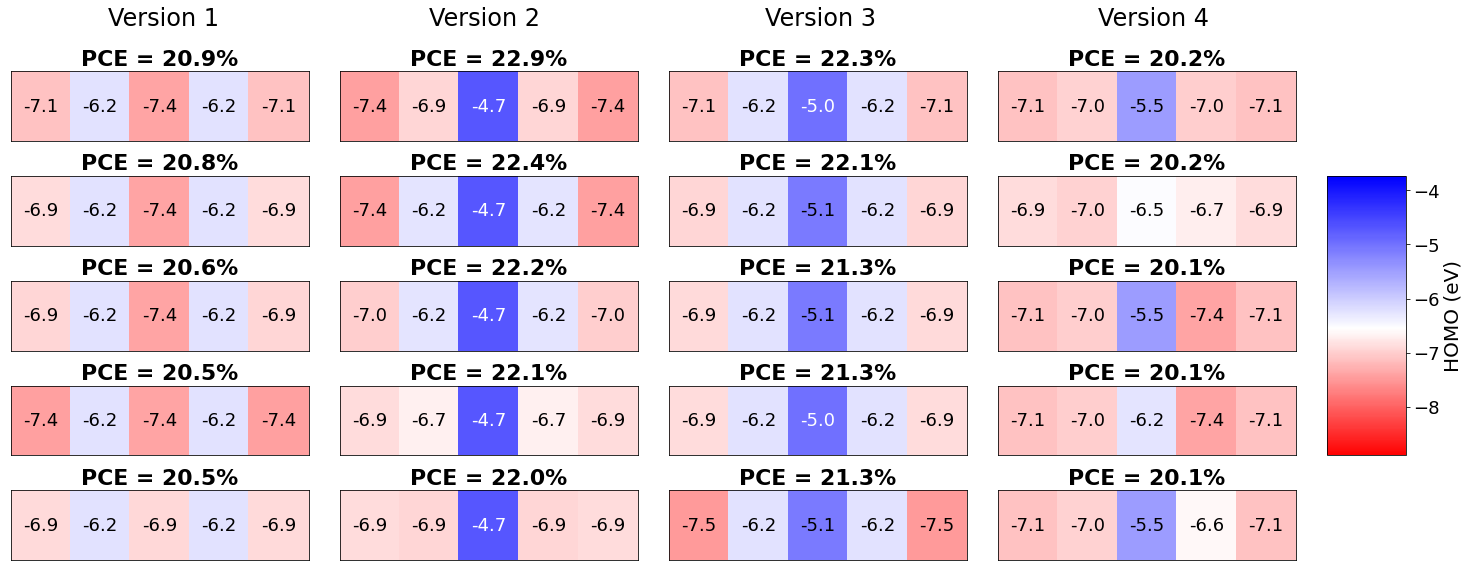

In [10]:
fig = plt.figure(figsize=(25, 9), constrained_layout=False)
gs = fig.add_gridspec(ncols = 25, nrows = 5)

# Version 1
ax_0 = fig.add_subplot(gs[0, :5])
ax_1= fig.add_subplot(gs[1, :5])
ax_2 = fig.add_subplot(gs[2, :5])
ax_3 = fig.add_subplot(gs[3, :5])
ax_4 = fig.add_subplot(gs[4, :5])

# Version 2
ax_5 = fig.add_subplot(gs[0, 6:11])
ax_6 = fig.add_subplot(gs[1, 6:11])
ax_7 = fig.add_subplot(gs[2, 6:11])
ax_8 = fig.add_subplot(gs[3, 6:11])
ax_9 = fig.add_subplot(gs[4, 6:11])

# Version 3 (5)
ax_10 = fig.add_subplot(gs[0, 12:17])
ax_11= fig.add_subplot(gs[1, 12:17])
ax_12= fig.add_subplot(gs[2, 12:17])
ax_13 = fig.add_subplot(gs[3, 12:17])
ax_14= fig.add_subplot(gs[4, 12:17])

# Version 4
ax_15= fig.add_subplot(gs[0, 18:23])
ax_16= fig.add_subplot(gs[1, 18:23])
ax_17= fig.add_subplot(gs[2, 18:23])
ax_18= fig.add_subplot(gs[3, 18:23])
ax_19= fig.add_subplot(gs[4, 18:23])

# Colorbar
ax_20= fig.add_subplot(gs[1:4, 24])

axes = [ax_0, ax_1, ax_2, ax_3, ax_4, ax_5, ax_6, ax_7, ax_8, ax_9, ax_10, ax_11, ax_12, ax_13, ax_14, ax_15, ax_16, ax_17, ax_18, ax_19]


v1_NFAs = ['78_48_5_48_78','90_48_5_48_90', '69_48_5_48_69', '88_48_5_48_88','52_48_0_48_52']
v1_PCE = [20.85133, 20.803003,20.615498,20.475269,20.459398]

v2_NFAs = ['62_174_103_174_62', '62_644_103_644_62', '55_644_103_644_55', '90_485_103_485_90', '90_174_103_174_90']
v2_PCE = [22.882837, 22.375808, 22.244967, 22.141827, 22.004729]

v4_NFAs = ['45_45_44_45_45_10201','42_45_63_45_42_10201','30_45_63_45_30_10201','51_45_44_45_51_10201','43_45_63_45_43_10201']
v4_PCE = [22.256138,22.081116,21.33963,21.295415,21.268988]

v3_NFAs = ['281_34_580_22_281_13051','279_34_457_115_279_13051','281_22_580_184_281_13051','281_22_714_184_281_13051','281_34_580_64_281_13051']
v3_PCE = [20.236201,20.198438,20.126982,20.076578,20.069705]


count = 0
for i in range(0,5):
    values = find_HOMOs(v1_NFAs[i], 'v1')
    plot_barcode(axes[count], values)

    PCE = str(round(v1_PCE[i], 1))
    title = 'PCE = ' + PCE + '%'

    axes[count].set_title(title, fontsize = 22, fontweight='bold')
    count +=1

for i in range(5):
    
    values = find_HOMOs(v2_NFAs[i], 'v2')
    plot_barcode(axes[count], values)

    PCE = str(round(v2_PCE[i], 1))
    title = 'PCE = ' + PCE + '%'

    axes[count].set_title(title, fontsize = 22, fontweight='bold')
    count +=1
    
for i in range(5):
    
    values = find_HOMOs(v4_NFAs[i], 'v4')
    plot_barcode(axes[count], values)

    PCE = str(round(v4_PCE[i], 1))
    title = 'PCE = ' + PCE + '%'

    axes[count].set_title(title, fontsize = 22, fontweight='bold')
    count +=1
    
for i in range(5):
    
    values = find_HOMOs(v3_NFAs[i], 'v3')
    plot_barcode(axes[count], values)

    PCE = str(round(v3_PCE[i], 1))
    title = 'PCE = ' + PCE + '%'

    axes[count].set_title(title, fontsize = 22, fontweight='bold')
    count +=1


colbar = mpl.colorbar.ColorbarBase(ax_20, cmap=cm.get_cmap('bwr_r'), norm=MidpointNormalize(midpoint=-6.5467, vmin=-8.89652, vmax = -3.73493), orientation='vertical')
colbar.set_label('HOMO (eV)', fontsize=20)
colbar.ax.tick_params(labelsize=18)



plt.subplots_adjust(hspace=0.5, wspace=-0.3)

fig.text(0.21, 0.95,'Version 1', ha='center', fontsize=24)
fig.text(0.388, 0.95,'Version 2', ha='center', fontsize=24)
fig.text(0.575, 0.95,'Version 3', ha='center', fontsize=24)
fig.text(0.76, 0.95,'Version 4', ha='center', fontsize=24)

plt.savefig('barcode_overall.png', dpi=600)
plt.savefig('barcode_overall.pdf', dpi=600)